### Visualizing for better understanding

In [4]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [9]:
import os
os.path.isfile("C://Users//KIIT//Desktop//SalaryData.csv")

True

In [10]:
# Import the dataset
dataset = pd.read_csv('C:/Users/KIIT/Desktop/salaryData.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
#Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [12]:
# standardizing the data as YearsExpreience is having much less value as compared to Salary.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,3.000000e+01,3.000000e+01
mean,-7.401487e-18,-4.440892e-17
std,1.017095e+00,1.017095e+00
min,-1.510053e+00,-1.419919e+00
25%,-7.574158e-01,-7.153855e-01
50%,-2.198178e-01,-3.994264e-01
75%,8.553781e-01,9.105167e-01
max,1.858894e+00,1.721028e+00


In [14]:
print(data_scaled)

[[-1.51005294 -1.36011263]
 [-1.43837321 -1.10552744]
 [-1.36669348 -1.419919  ]
 [-1.18749416 -1.20495739]
 [-1.11581443 -1.33978143]
 [-0.86493538 -0.71830716]
 [-0.82909552 -0.58815781]
 [-0.75741579 -0.79981746]
 [-0.75741579 -0.42881019]
 [-0.57821647 -0.69801306]
 [-0.50653674 -0.47433279]
 [-0.47069688 -0.74976858]
 [-0.47069688 -0.70662043]
 [-0.43485702 -0.70201994]
 [-0.29149756 -0.55250402]
 [-0.1481381  -0.29921736]
 [-0.07645838 -0.37004264]
 [-0.00477865  0.26285865]
 [ 0.21026054  0.19885989]
 [ 0.2461004   0.66547573]
 [ 0.53281931  0.58377993]
 [ 0.6403389   0.82623317]
 [ 0.92705781  0.93861127]
 [ 1.03457741  1.40274136]
 [ 1.21377673  1.24020308]
 [ 1.32129632  1.09740238]
 [ 1.50049564  1.51986835]
 [ 1.5363355   1.3590738 ]
 [ 1.78721455  1.72102849]
 [ 1.85889428  1.70177321]]


In [15]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
#We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results as we have discussed in the previous section as well.

In [18]:
#Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [19]:
# inertia on the fitted data
kmeans.inertia_

12.746903597965789

In [20]:
#We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

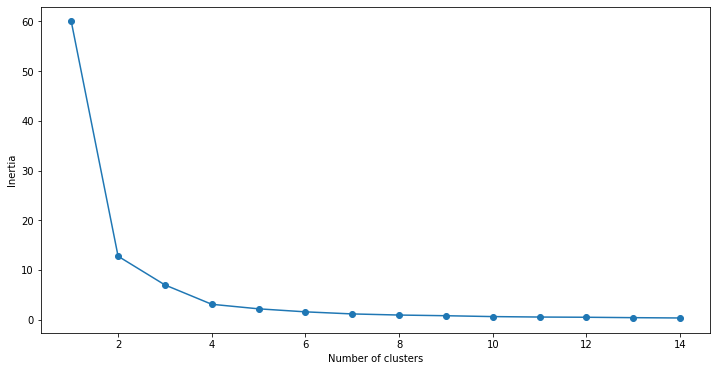

In [22]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
#from this it is clear that the no. of clusters formed can be in the range 4-6.

In [24]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [25]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    12
1     7
3     6
2     5
Name: cluster, dtype: int64

In [27]:
#12+7+6+5 = 30 which is the total no of rows in the dataset.Thus it pretty much tells how accurate the model is.